In [2]:
import os
import numpy as np
import librosa

# 定义文件夹路径
folder_1 = r"D:\Dataset\Data_Watkins\Best_WhiteBeaked_sounds"
folder_2 = r"D:\Dataset\Data_Watkins\Best_AtlanticSpotted_sounds"
folder_3 = r"D:\Dataset\Data_Watkins\Best_WhiteSided_sounds"

# 目标采样点数
target_length = 50000

# 处理音频文件的函数
def process_audio_files(folder):
    processed_audios = []
    audio_ids = []   # 存储文件 ID
    sr_list = []     # 存储采样率

    for file in os.listdir(folder):
        if file.endswith(".wav"):
            file_path = os.path.join(folder, file)

            # 读取音频，保持原始采样率
            audio, sr = librosa.load(file_path, sr=None)
            total_samples = len(audio)

            # 记录文件 ID（不包含扩展名）
            file_id = os.path.splitext(file)[0]

            # 如果音频长度不足 target_length，则前面补零
            if total_samples < target_length:
                audio = np.pad(audio, (target_length - total_samples, 0), mode='constant')
                processed_audios.append(audio)
                audio_ids.append(file_id)  # 记录 ID
                sr_list.append(sr)         # 记录采样率
            else:
                # 计算应切分的段数
                num_segments = max(1, round(total_samples / target_length))
                segment_length = total_samples // num_segments

                for i in range(num_segments):
                    start = i * segment_length
                    end = min(start + target_length, total_samples)  # 确保不越界

                    segment = audio[start:end]  # 默认切片
                    if len(segment) < target_length:
                        segment = np.pad(segment, (0, target_length - len(segment)), mode='constant')  # 不足时填充0

                    processed_audios.append(segment)
                    audio_ids.append(f"{file_id}_seg{i}")  # 记录分割后的 ID
                    sr_list.append(sr)  # 记录对应的采样率

    return np.array(processed_audios), np.array(audio_ids), np.array(sr_list)

# 处理三个文件夹
data_whitebeaked, ids_whitebeaked, sr_whitebeaked = process_audio_files(folder_1)
data_atlanticspotted, ids_atlanticspotted, sr_atlanticspotted = process_audio_files(folder_2)
data_whitesided, ids_whitesided, sr_whitesided = process_audio_files(folder_3)

# 对每个样本归一化到 [-1, 1]
def normalize_audio(data):
    return np.array([sample / np.max(np.abs(sample)) if np.max(np.abs(sample)) > 0 else sample for sample in data])

data_whitebeaked = normalize_audio(data_whitebeaked)
data_atlanticspotted = normalize_audio(data_atlanticspotted)
data_whitesided = normalize_audio(data_whitesided)

# 保存音频数据
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked_sounds.npy", data_whitebeaked)
np.save(r"D:\Dataset\Temp_Results\Train_Test\atlanticspotted_sounds.npy", data_atlanticspotted)
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitesided_sounds.npy", data_whitesided)

# 保存音频 ID
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked_ids.npy", ids_whitebeaked)
np.save(r"D:\Dataset\Temp_Results\Train_Test\atlanticspotted_ids.npy", ids_atlanticspotted)
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitesided_ids.npy", ids_whitesided)

# 保存采样率
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked_sr.npy", sr_whitebeaked)
np.save(r"D:\Dataset\Temp_Results\Train_Test\atlanticspotted_sr.npy", sr_atlanticspotted)
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitesided_sr.npy", sr_whitesided)

# 也可以保存为可读的 .txt 文件
np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked_ids.txt", ids_whitebeaked, fmt="%s")
np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\atlanticspotted_ids.txt", ids_atlanticspotted, fmt="%s")
np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\whitesided_ids.txt", ids_whitesided, fmt="%s")

np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked_sr.txt", sr_whitebeaked, fmt="%d")
np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\atlanticspotted_sr.txt", sr_atlanticspotted, fmt="%d")
np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\whitesided_sr.txt", sr_whitesided, fmt="%d")

# 输出数组大小
print(f"WhiteBeaked sounds shape: {data_whitebeaked.shape}, IDs: {ids_whitebeaked.shape}, SRs: {sr_whitebeaked.shape}")
print(f"AtlanticSpotted sounds shape: {data_atlanticspotted.shape}, IDs: {ids_atlanticspotted.shape}, SRs: {sr_atlanticspotted.shape}")
print(f"WhiteSided sounds shape: {data_whitesided.shape}, IDs: {ids_whitesided.shape}, SRs: {sr_whitesided.shape}")

print("处理完成，数据、采样率及音频 ID 已保存。")


WhiteBeaked sounds shape: (199, 50000), IDs: (199,), SRs: (199,)
AtlanticSpotted sounds shape: (195, 50000), IDs: (195,), SRs: (195,)
WhiteSided sounds shape: (336, 50000), IDs: (336,), SRs: (336,)
处理完成，数据、采样率及音频 ID 已保存。


In [4]:
# 筛选 whiteSided 中的 195 个样本
import random
import numpy as np

# 设置随机种子以保证可复现性
random.seed(42)

# 确保数据量足够
num_samples = min(195, len(data_whitesided))

# 随机选择 195 个索引
selected_indices = random.sample(range(len(data_whitesided)), num_samples)

# 根据索引筛选数据、ID 和采样率
data_whitesided = data_whitesided[selected_indices]
ids_whitesided = ids_whitesided[selected_indices]
sr_whitesided = sr_whitesided[selected_indices]  # 采样率同步筛选

# 保存筛选后的数据、ID 和采样率
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitesided_sounds.npy", data_whitesided)
np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\whitesided_ids.txt", ids_whitesided, fmt="%s")
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitesided_sr.npy", sr_whitesided)
np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\rwhitesided_sr.txt", sr_whitesided, fmt="%d")  # 以可读格式保存

# 输出筛选后数据大小
print(f"Filtered WhiteSided sounds shape: {data_whitesided.shape}, IDs: {ids_whitesided.shape}, SRs: {sr_whitesided.shape}")

print("Whitesided 数据筛选完成，已保存 195 个样本，并同步采样率。")


Filtered WhiteSided sounds shape: (195, 50000), IDs: (195,), SRs: (195,)
Whitesided 数据筛选完成，已保存 195 个样本，并同步采样率。


In [5]:
# 筛选 whitebeaked 中的 195 个样本
import random
import numpy as np

# 设置随机种子以保证可复现性
random.seed(42)

# 确保数据量足够
num_samples = min(195, len(data_whitebeaked))

# 随机选择 195 个索引
selected_indices = random.sample(range(len(data_whitebeaked)), num_samples)

# 根据索引筛选数据、ID 和采样率
data_whitebeaked = data_whitebeaked[selected_indices]
ids_whitebeaked = ids_whitebeaked[selected_indices]
sr_whitebeaked = sr_whitebeaked[selected_indices]  # 采样率同步筛选

# 保存筛选后的数据、ID 和采样率
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked_sounds.npy", data_whitebeaked)
np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked_ids.txt", ids_whitebeaked, fmt="%s")
np.save(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked_sr.npy", sr_whitebeaked)
np.savetxt(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked_sr.txt", sr_whitebeaked, fmt="%d")  # 以可读格式保存

# 输出筛选后数据大小
print(f"Filtered whitebeaked sounds shape: {data_whitebeaked.shape}, IDs: {ids_whitebeaked.shape}, SRs: {sr_whitebeaked.shape}")

print("whitebeaked 数据筛选完成，已保存 195 个样本，并同步采样率。")


Filtered whitebeaked sounds shape: (195, 50000), IDs: (195,), SRs: (195,)
whitebeaked 数据筛选完成，已保存 195 个样本，并同步采样率。


In [11]:
import numpy as np
from sklearn.utils import shuffle

# 加载音频数据和对应的 ID、采样率
def load_data(path, label):
    data = np.load(f"{path}_sounds.npy")
    ids = np.loadtxt(f"{path}_ids.txt", dtype=str)
    sr = np.load(f"{path}_sr.npy")
    labels = np.full(len(data), label, dtype=int)
    return data, ids, sr, labels

data_whitebeaked, ids_whitebeaked, sr_whitebeaked, labels_whitebeaked = load_data(r"D:\Dataset\Temp_Results\Train_Test\whitebeaked", 0)
data_atlanticspotted, ids_atlanticspotted, sr_atlanticspotted, labels_atlanticspotted = load_data(r"D:\Dataset\Temp_Results\Train_Test\atlanticspotted", 1)
data_whitesided, ids_whitesided, sr_whitesided, labels_whitesided = load_data(r"D:\Dataset\Temp_Results\Train_Test\whitesided", 2)

# 归一化音频数据
def normalize_audio(data):
    return np.array([sample / np.max(np.abs(sample)) if np.max(np.abs(sample)) > 0 else sample for sample in data])

data_whitebeaked = normalize_audio(data_whitebeaked)
data_atlanticspotted = normalize_audio(data_atlanticspotted)
data_whitesided = normalize_audio(data_whitesided)

# 打乱数据
def shuffle_data(X, y, ids, sr):
    return shuffle(X, y, ids, sr, random_state=42)

data_whitebeaked, labels_whitebeaked, ids_whitebeaked, sr_whitebeaked = shuffle_data(data_whitebeaked, labels_whitebeaked, ids_whitebeaked, sr_whitebeaked)
data_atlanticspotted, labels_atlanticspotted, ids_atlanticspotted, sr_atlanticspotted = shuffle_data(data_atlanticspotted, labels_atlanticspotted, ids_atlanticspotted, sr_atlanticspotted)
data_whitesided, labels_whitesided, ids_whitesided, sr_whitesided = shuffle_data(data_whitesided, labels_whitesided, ids_whitesided, sr_whitesided)

# 按类别划分 80% 训练集，20% 测试集
def split_data(X, y, ids, sr, train_ratio=0.8):
    split_idx = int(len(X) * train_ratio)
    return (X[:split_idx], y[:split_idx], ids[:split_idx], sr[:split_idx]), (X[split_idx:], y[split_idx:], ids[split_idx:], sr[split_idx:])

(train_whitebeaked, test_whitebeaked) = split_data(data_whitebeaked, labels_whitebeaked, ids_whitebeaked, sr_whitebeaked)
(train_atlanticspotted, test_atlanticspotted) = split_data(data_atlanticspotted, labels_atlanticspotted, ids_atlanticspotted, sr_atlanticspotted)
(train_whitesided, test_whitesided) = split_data(data_whitesided, labels_whitesided, ids_whitesided, sr_whitesided)

# 合并训练集和测试集
X_train = np.concatenate([train_whitebeaked[0], train_atlanticspotted[0], train_whitesided[0]], axis=0)
y_train = np.concatenate([train_whitebeaked[1], train_atlanticspotted[1], train_whitesided[1]], axis=0)
ids_train = np.concatenate([train_whitebeaked[2], train_atlanticspotted[2], train_whitesided[2]], axis=0)
sr_train = np.concatenate([train_whitebeaked[3], train_atlanticspotted[3], train_whitesided[3]], axis=0)

X_test = np.concatenate([test_whitebeaked[0], test_atlanticspotted[0], test_whitesided[0]], axis=0)
y_test = np.concatenate([test_whitebeaked[1], test_atlanticspotted[1], test_whitesided[1]], axis=0)
ids_test = np.concatenate([test_whitebeaked[2], test_atlanticspotted[2], test_whitesided[2]], axis=0)
sr_test = np.concatenate([test_whitebeaked[3], test_atlanticspotted[3], test_whitesided[3]], axis=0)

# 再次打乱训练集和测试集
X_train, y_train, ids_train, sr_train = shuffle_data(X_train, y_train, ids_train, sr_train)
X_test, y_test, ids_test, sr_test = shuffle_data(X_test, y_test, ids_test, sr_test)

# 保存数据集
np.save(r"D:\Dataset\Temp_Results\Train_Test\X_train.npy", X_train)
np.save(r"D:\Dataset\Temp_Results\Train_Test\y_train.npy", y_train)
np.save(r"D:\Dataset\Temp_Results\Train_Test\ids_train.npy", ids_train)
np.save(r"D:\Dataset\Temp_Results\Train_Test\sr_train.npy", sr_train)

np.save(r"D:\Dataset\Temp_Results\Train_Test\X_test.npy", X_test)
np.save(r"D:\Dataset\Temp_Results\Train_Test\y_test.npy", y_test)
np.save(r"D:\Dataset\Temp_Results\Train_Test\ids_test.npy", ids_test)
np.save(r"D:\Dataset\Temp_Results\Train_Test\sr_test.npy", sr_test)

print(f"训练集大小: {X_train.shape}, 测试集大小: {X_test.shape}")
print("数据集处理完成，已保存训练集和测试集，并同步采样率。")


训练集大小: (468, 50000), 测试集大小: (117, 50000)
数据集处理完成，已保存训练集和测试集，并同步采样率。


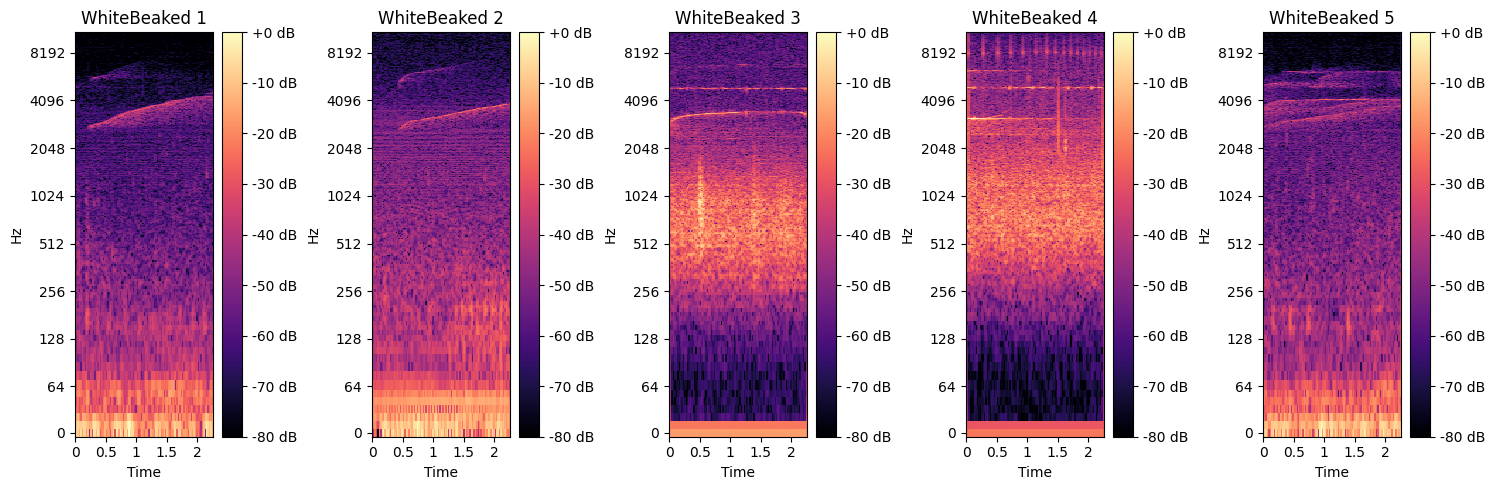

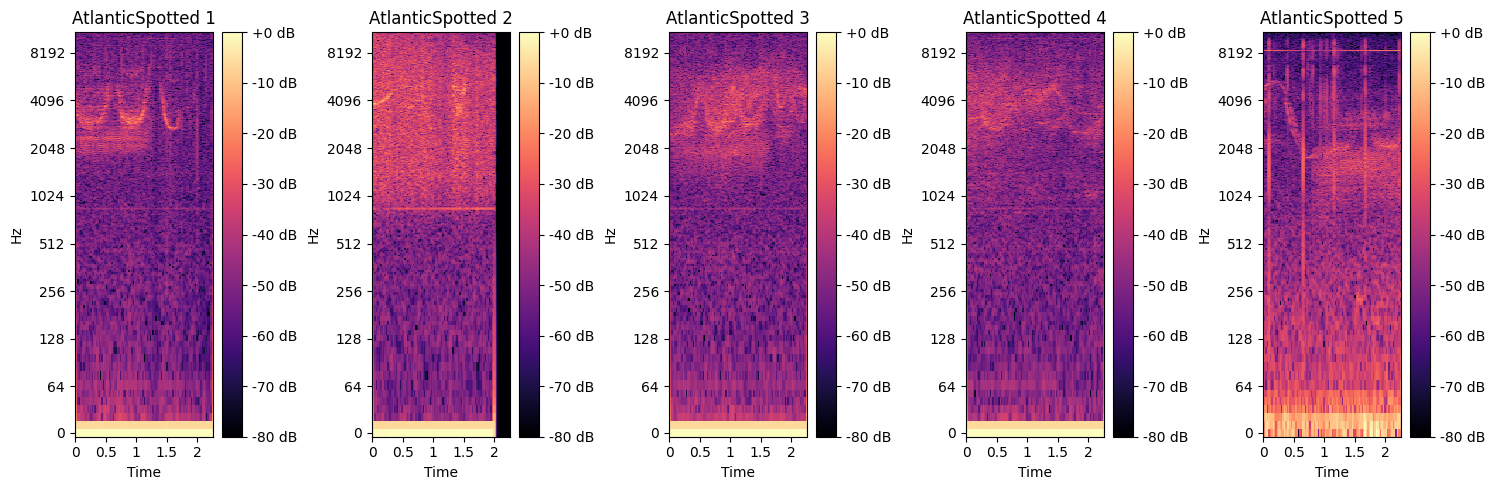

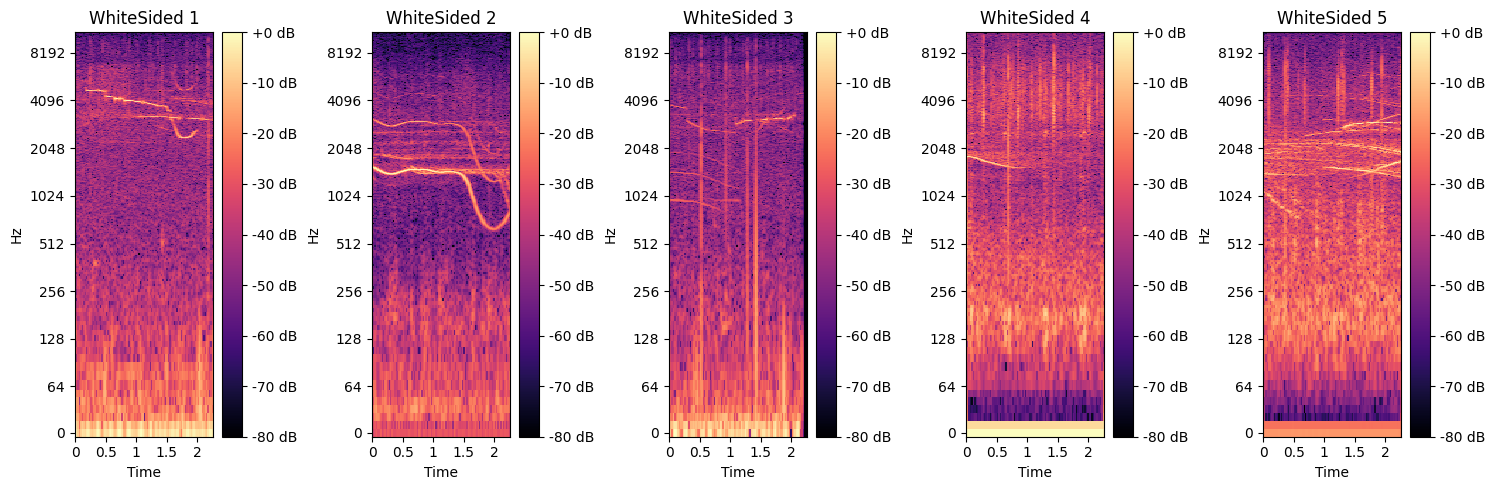

时频图绘制完成，检查数据是否异常。


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import random

# 随机选择 5 个样本
def select_random_samples(data, num_samples=5):
    indices = random.sample(range(len(data)), num_samples)
    return data[indices]

samples_whitebeaked = select_random_samples(data_whitebeaked)
samples_atlanticspotted = select_random_samples(data_atlanticspotted)
samples_whitesided = select_random_samples(data_whitesided)

# 绘制时频图
def plot_spectrogram(samples, title, sr=22050):
    plt.figure(figsize=(15, 5))
    for i, sample in enumerate(samples):
        plt.subplot(1, 5, i + 1)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(sample)), ref=np.max)
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"{title} {i+1}")
    plt.tight_layout()
    plt.show()

plot_spectrogram(samples_whitebeaked, "WhiteBeaked")
plot_spectrogram(samples_atlanticspotted, "AtlanticSpotted")
plot_spectrogram(samples_whitesided, "WhiteSided")

print("时频图绘制完成，检查数据是否异常。")